# Extremos (relativos y absolutos) con Python

Esta sección pretende ser un compendio (esperemos que claro y ordenado) de todo el `Python` 
que hemos ido usando en las tres últimas secciones del Capítulo 3. 

## Cálculo de extremos relativos con `Python`

Mostramos, sobre un ejemplo, cómo se localizan los puntos críticos y como se clasifican, con la ayuda de `Python`.

En este caso, buscamos los puntos críticos de la función $f(x,y) = -x^3 + 4xy - 2y^2 +1$ en todo $\mathbb{R}^2$.

Como ya dijimos en la sección correspondiente del capítulo 3, aquí está hecho un poco *de andar por casa*. Te planteamos como reto escribir una `function` que clasifique automáticamente los puntos críticos... ¿Lo has hecho?

In [1]:
import sympy as sp
import numpy as np

x, y = sp.symbols('x y', real=True) # define as variables simbólicas x e y
f = sp.Lambda((x,y), -x**3 +4*x*y-2*y**2+1)

# Calculamos el gradiente de f
grad_f =  sp.transpose(sp.Matrix([f(x,y)]).jacobian([x,y]))
display(grad_f)

# Buscamos los puntos críticos
sol = sp.solve((sp.Eq(grad_f[0],0),sp.Eq(grad_f[1],0)),(x,y), dict=True)
display('Puntos críticos:', sol)

# Definimos la hessiana son sp.hessian
H = sp.Lambda((x,y), sp.hessian(f(x,y), (x,y)))
display('Matriz hessiana en (x,y): ', H(x,y))

# Clasificación del primer punto crítico
H0 = H(sol[0][x],sol[0][y])
display('Hessiana del primer punto crítico: ', H0)
print("Determinante: ",sp.det(H0), ". Posición (1,1):", H0[0,0])

# Clasificación del segundo punto crítico
H1 = H(sol[1][x],sol[1][y])
display('Hessiana del segundo punto crítico: ', H1)
print("Determinante: ",sp.det(H1), ". Posición (1,1):", H1[0,0])

Matrix([
[-3*x**2 + 4*y],
[    4*x - 4*y]])

'Puntos críticos:'

[{x: 0, y: 0}, {x: 4/3, y: 4/3}]

'Matriz hessiana en (x,y): '

Matrix([
[-6*x,  4],
[   4, -4]])

'Hessiana del primer punto crítico: '

Matrix([
[0,  4],
[4, -4]])

Determinante:  -16 . Posición (1,1): 0


'Hessiana del segundo punto crítico: '

Matrix([
[-8,  4],
[ 4, -4]])

Determinante:  16 . Posición (1,1): -8


## Cálculo de extremos absolutos sobre una restricción

Aquí mostramoscómo implementar, con la ayuda de `Python`, el método de los multiplicadores de Lagrange. 
Lo hacemos sobre un ejemplo:

````{prf:example} Máximo absoluto en la piel de la elipse
:label: ex_07_lagrange1_2
:nonumber:
Calcular el máximo absoluto de

$$
f(x,y) = 4xy
$$
en el conjunto

$$
C = \left\{ (x,y) \in\mathbb{R}^{2} : \frac{x^2}{3^2} + \frac{y^2}{4^2} = 1 \right\}.
$$
````

In [2]:
import sympy as sp

x, y, l = sp.symbols('x y l', real=True) # definimos las variables simbólicas x, y, l
f = sp.Lambda((x,y), 4*x*y) # función a optimizar
g = sp.Lambda((x,y), x**2/9 + y**2/16) # restricción

# Cálculo de puntos críticos (posibles extremos globales)
grad_f =  sp.transpose(sp.Matrix([f(x,y)]).jacobian([x,y]))
grad_g = sp.transpose(sp.Matrix([g(x,y)]).jacobian([x,y]))
sol = sp.solve((sp.Eq(grad_f[0],l*grad_g[0]),sp.Eq(grad_f[1],l*grad_g[1]),sp.Eq(g(x,y),1)), 
               (x,y,l), dict=True)

for p in sol:
    print('Punto crítico (x,y,lambda)=',p,'; f(x,y)=', sp.N(f(p[x],p[y])))

Punto crítico (x,y,lambda)= {l: -24, x: -3*sqrt(2)/2, y: 2*sqrt(2)} ; f(x,y)= -24.0000000000000
Punto crítico (x,y,lambda)= {l: -24, x: 3*sqrt(2)/2, y: -2*sqrt(2)} ; f(x,y)= -24.0000000000000
Punto crítico (x,y,lambda)= {l: 24, x: -3*sqrt(2)/2, y: -2*sqrt(2)} ; f(x,y)= 24.0000000000000
Punto crítico (x,y,lambda)= {l: 24, x: 3*sqrt(2)/2, y: 2*sqrt(2)} ; f(x,y)= 24.0000000000000


Visualizamos estos puntos críticos sobre las curvas de nivel:

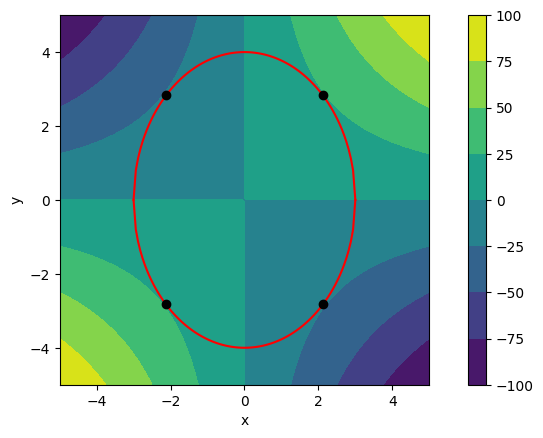

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Nube de puntos para el cálculo de las curvas de nivel
N = 100  
xvec = np.linspace(-5, 5, N)
yvec = np.linspace(-5, 5, N)
X, Y = np.meshgrid(xvec, yvec)
F = sp.lambdify((x,y),f(x,y),"numpy")

# Representación gráfica de f
plt.contourf(X, Y, F(X,Y))
plt.colorbar()  
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

# Representación gráfica de la restricción
xvec = np.linspace(-3, 3, N)
sol_curve = sp.solve(sp.Eq(g(x,y),1),y) # despejar y en función de x en g(x,y)=1
for c in sol_curve:
    curve = sp.lambdify(x,c,"numpy")
    plt.plot(xvec, curve(xvec),'r')

# Representación gráfica de los extremos relativos
for p in sol:
    plt.plot(p[x],p[y],'ko')

plt.show()

## Cálculo de extremos absolutos sobre interior y frontera

En este caso queremos 

````{prf:example} Máximo absoluto en la elipse: interior + piel
:label: ex_07_lagrange1_2
:nonumber:
Calcular el máximo absoluto de

$$
f(x,y) = 4xy
$$
en el conjunto

$$
C = \left\{ (x,y) \in\mathbb{R}^{2} : \frac{x^2}{3^2} + \frac{y^2}{4^2} \leq 1 \right\}.
$$
````

In [6]:
import sympy as sp

x, y, l = sp.symbols('x y l', real=True) # definimos las variables simbólicas x, y, l
f = sp.Lambda((x,y), 4*x*y) # función a optimizar
g = sp.Lambda((x,y), x**2/9 + y**2/16) # restricción

# Primer paso: puntos críticos de f en el interior de la elipse
grad_f =  sp.transpose(sp.Matrix([f(x,y)]).jacobian([x,y]))
sol1 = sp.solve((sp.Eq(grad_f[0],0),sp.Eq(grad_f[1],0)),(x,y), dict=True)

# Segundo paso: posibles extremos en la frontera de la elipse
grad_g = sp.transpose(sp.Matrix([g(x,y)]).jacobian([x,y]))
sol2= sp.solve((sp.Eq(grad_f[0],l*grad_g[0]),sp.Eq(grad_f[1],l*grad_g[1]),sp.Eq(g(x,y),1)), 
               (x,y,l), dict=True)

sol = sol1 + sol2

for p in sol:
    print('Punto crítico (x,y,lambda)=',p,'; f(x,y)=', sp.N(f(p[x],p[y])))

Punto crítico (x,y,lambda)= {y: 0, x: 0} ; f(x,y)= 0
Punto crítico (x,y,lambda)= {l: -24, x: -3*sqrt(2)/2, y: 2*sqrt(2)} ; f(x,y)= -24.0000000000000
Punto crítico (x,y,lambda)= {l: -24, x: 3*sqrt(2)/2, y: -2*sqrt(2)} ; f(x,y)= -24.0000000000000
Punto crítico (x,y,lambda)= {l: 24, x: -3*sqrt(2)/2, y: -2*sqrt(2)} ; f(x,y)= 24.0000000000000
Punto crítico (x,y,lambda)= {l: 24, x: 3*sqrt(2)/2, y: 2*sqrt(2)} ; f(x,y)= 24.0000000000000
